<a href="https://colab.research.google.com/github/prince545/exploratory-data-analysis/blob/main/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Linear Regression
RMSE: 0.7456
R² Score: 0.5758

Ridge Regression
RMSE: 0.7456
R² Score: 0.5758

Lasso Regression
RMSE: 0.8244
R² Score: 0.4814


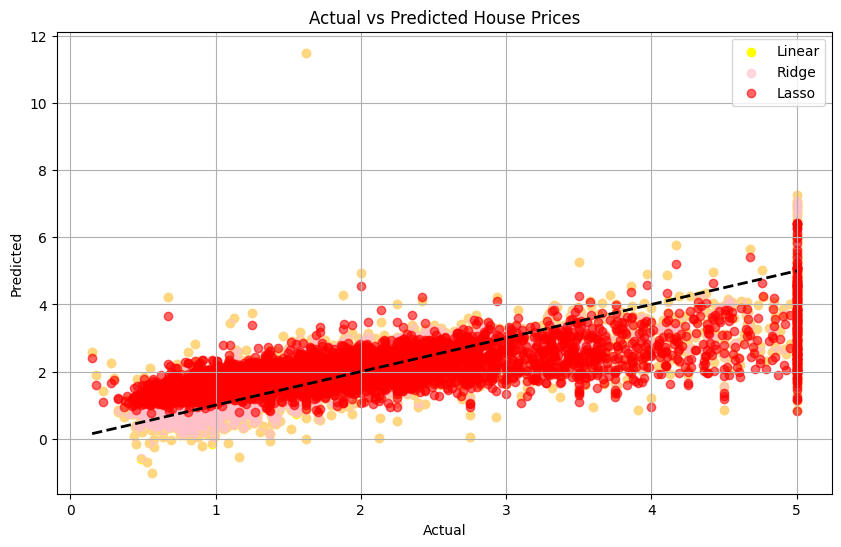

In [3]:
# 📦 Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# 📥 Step 2: Load Dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

print(df.head())

# 🧹 Step 3: Preprocessing
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧠 Step 4: Train Models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# 📊 Step 5: Evaluate Models
models = {'Linear Regression': lr, 'Ridge Regression': ridge, 'Lasso Regression': lasso}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# 📈 Step 6: Visualization - Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr.predict(X_test_scaled), color='yellow', label='Linear')
plt.scatter(y_test, ridge.predict(X_test_scaled), color='pink', label='Ridge', alpha=0.6)
plt.scatter(y_test, lasso.predict(X_test_scaled), color='red', label='Lasso', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()
